In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('testing_data.csv')

In [4]:
train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [5]:
train.shape, test.shape

((105000, 26), (45000, 25))

# EDA

In [6]:
data = pd.concat([train, test], axis=0)

In [7]:
data.shape

(150000, 26)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  int64  
 1   Date_Of_Disbursement       149657 non-null  object 
 2   Business                   149979 non-null  object 
 3   Jobs_Reatained             150000 non-null  int64  
 4   Jobs_Created               150000 non-null  int64  
 5   Year_Of_Commitment         150000 non-null  object 
 6   Guaranteed_Approved _Loan  150000 non-null  object 
 7   Borrower_Name              149995 non-null  object 
 8   Low_Documentation_Loan     149500 non-null  object 
 9   Demography                 150000 non-null  object 
 10  State_Of_Bank              150000 non-null  object 
 11  ChargedOff_Amount          150000 non-null  object 
 12  Borrower_City              150000 non-null  object 
 13  Borrower_State             149

In [9]:
data.isnull().sum()

ID                               0
Date_Of_Disbursement           343
Business                        21
Jobs_Reatained                   0
Jobs_Created                     0
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    5
Low_Documentation_Loan         500
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                  49
Gross_Amount_Balance             0
Count_Employees                  0
Classification_Code              0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Loan_Term                        0
Commitment_Date                  0
Primary_Loan_Digit               0
Code_Franchise                   0
Name_Of_Bank                     0
Revolving_Credit_Line        14316
Default                      45000
dtype: int64

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,150000.0,NaN,NaN,NaN,74999.5,43301.414527,0.0,37499.75,74999.5,112499.25,149999.0
Date_Of_Disbursement,149657,4276,31-Jul-95,1567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business,149979,3,Existing,107153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jobs_Reatained,150000.0,NaN,NaN,NaN,12.308127,264.27454,0.0,0.0,1.0,4.0,8800.0
Jobs_Created,150000.0,NaN,NaN,NaN,9.960973,264.102358,0.0,0.0,0.0,1.0,8800.0
Year_Of_Commitment,150000,92,2007,11044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guaranteed_Approved _Loan,150000,12668,Rs.2032000.0,9232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Borrower_Name,149995,143138,SUBWAY,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low_Documentation_Loan,149500,7,No,131611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Demography,150000,3,Urban,82184,NaN,NaN,NaN,NaN,NaN,NaN,NaN


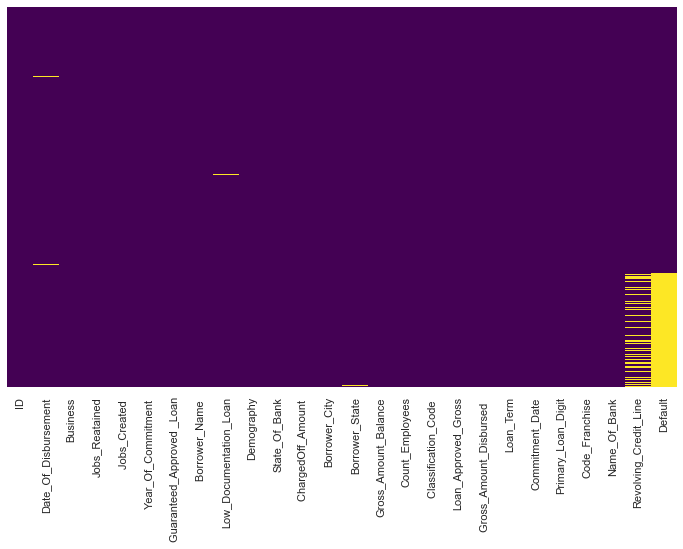

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis", cbar=False,ax=ax)
plt.show()

In [12]:
data.tail()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
44995,149995,30-Nov-05,Existing,3,1,2005,Rs.1625600.0,ULTIMATE COMPUTERS,No,Urban,ML,Rs.1838309.76,Bhuj,Gujarat,Rs.0.0,3,423690,Rs.3251200.0,Rs.2291852.16,81,29-Sep-05,9135674006,1,Saurashtra Gramin Bank,Yes,NaN
44996,149996,31-Jul-02,Existing,12,0,2002,Rs.29657040.0,"MARK A. HENKE, D>M.D., P.C.",No,Urban,KL,Rs.0.0,Rajnandgaon,Chhattisgarh,Rs.0.0,12,621210,Rs.39542720.0,Rs.36292170.24,180,27-Jun-02,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN,NaN
44997,149997,13-Aug-08,Existing,0,15,2008,Rs.60878720.0,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,UP,Rs.0.0,Sankeshwara,Karnataka,Rs.0.0,4,621111,Rs.60878720.0,Rs.60878720.0,360,15-Apr-08,3225006003,1,Aryavart Bank,NaN,NaN
44998,149998,28-Feb-03,Existing,2,0,2003,Rs.2032000.0,CHO & SONS CORP,No,Urban,PB,Rs.0.0,Kakinada,Andhra Pradesh,Rs.0.0,2,445120,Rs.4064000.0,Rs.4064000.0,90,24-Jan-03,6047584010,1,Au Small Finance Bank Ltd.,NaN,NaN
44999,149999,1-Apr-10,Existing,0,2,2008,Rs.1016000.0,"Hanft Family Chiropractic, Inc",No,Rural,JK,Rs.0.0,Punjaipugalur,Tamil Nadu,Rs.0.0,1,621310,Rs.2032000.0,Rs.2233249.2800000003,94,7-Jul-08,3148675004,0,Shinhan Bank,NaN,NaN


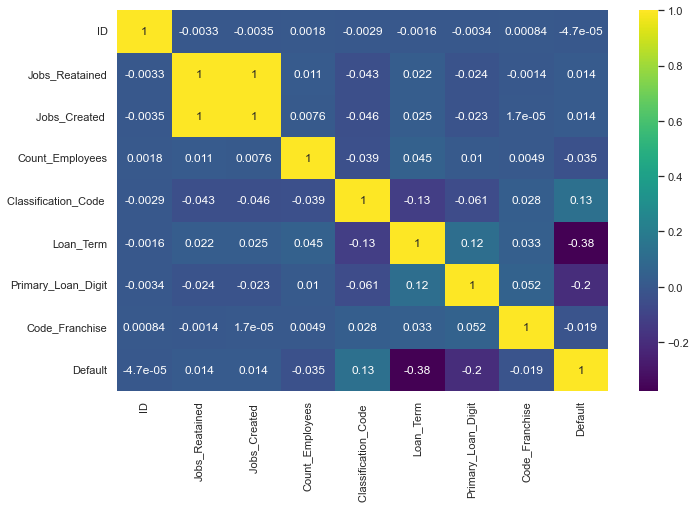

In [13]:
plt.figure(figsize=(11,7))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

In [14]:
data['Revolving_Credit_Line'].fillna(data['Revolving_Credit_Line'].mode()[0], inplace=True)

In [15]:
data['Date_Of_Disbursement'].fillna(data['Date_Of_Disbursement'].mode()[0], inplace=True)

In [16]:
data['Business'].fillna(data['Business'].mode()[0], inplace=True)

In [17]:
data['Low_Documentation_Loan'].fillna(data['Low_Documentation_Loan'].mode()[0], inplace=True)

In [18]:
data['Borrower_State'].fillna(data['Borrower_State'].mode()[0], inplace=True)

In [19]:
data.isnull().sum()

ID                               0
Date_Of_Disbursement             0
Business                         0
Jobs_Reatained                   0
Jobs_Created                     0
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    5
Low_Documentation_Loan           0
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                   0
Gross_Amount_Balance             0
Count_Employees                  0
Classification_Code              0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Loan_Term                        0
Commitment_Date                  0
Primary_Loan_Digit               0
Code_Franchise                   0
Name_Of_Bank                     0
Revolving_Credit_Line            0
Default                      45000
dtype: int64

In [20]:
data.head(3)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0.0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1.0
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0.0


In [22]:
data1 = data.drop(['ID','Borrower_Name ','Name_Of_Bank', 'Commitment_Date','Year_Of_Commitment '], axis=1)

In [24]:
data1['Date_Of_Disbursement'] = pd.to_datetime(data1.Date_Of_Disbursement, dayfirst=True)

In [25]:
data1.head()

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Revolving_Credit_Line,Default
0,1991-07-31,Existing,0,0,Rs.33121600.0,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,4419763001,1,No,0.0
1,2006-04-30,New,0,6,Rs.32735520.0,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,1709796003,1,0,1.0
2,2004-06-30,Existing,4,0,Rs.1422400.0,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,7464754008,1,Yes,0.0
3,2006-01-31,New,9,1,Rs.2032000.0,No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,1588745006,0,Yes,0.0
4,2004-12-31,Existing,4,0,Rs.22981920.0,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,8037734002,1,0,1.0


In [26]:
data1['Disbursement_Day'] = data1.Date_Of_Disbursement.dt.day

In [28]:
data1['Disbursement_Month'] = data1.Date_Of_Disbursement.dt.month

In [29]:
data1['Disbursement_Year'] = data1.Date_Of_Disbursement.dt.year

In [30]:
data1.head()

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Revolving_Credit_Line,Default,Disbursement_Day,Disbursement_Month,Disbursement_Year
0,1991-07-31,Existing,0,0,Rs.33121600.0,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,38,0,Rs.40640000.0,Rs.40640000.0,126,4419763001,1,No,0.0,31,7,1991
1,2006-04-30,New,0,6,Rs.32735520.0,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,6,451120,Rs.43647360.0,Rs.43647360.0,123,1709796003,1,0,1.0,30,4,2006
2,2004-06-30,Existing,4,0,Rs.1422400.0,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,4,541618,Rs.2844800.0,Rs.5961400.32,90,7464754008,1,Yes,0.0,30,6,2004
3,2006-01-31,New,9,1,Rs.2032000.0,No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,7,811112,Rs.4064000.0,Rs.4064000.0,126,1588745006,0,Yes,0.0,31,1,2006
4,2004-12-31,Existing,4,0,Rs.22981920.0,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,4,722211,Rs.30642560.0,Rs.30642560.0,104,8037734002,1,0,1.0,31,12,2004


In [38]:
def remove_rs(x):
    if isinstance(x, str):
        a = x.replace('Rs.', '')
        return float(a)

In [40]:
data1['Guaranteed_Approved _Loan'] = data1['Guaranteed_Approved _Loan'].apply(remove_rs)

In [43]:
data1['ChargedOff_Amount '] = data1['ChargedOff_Amount '].apply(remove_rs)

In [44]:
data1['Gross_Amount_Balance'] = data1['Gross_Amount_Balance'].apply(remove_rs)

In [45]:
data1['Loan_Approved_Gross'] = data1['Loan_Approved_Gross'].apply(remove_rs)

In [50]:
data1['Gross_Amount_Disbursed  '] = data1['Gross_Amount_Disbursed  '].apply(remove_rs)

In [51]:
data1.head()

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Revolving_Credit_Line,Default,Disbursement_Day,Disbursement_Month,Disbursement_Year
0,1991-07-31,Existing,0,0,33121600.0,No,Undefined,AP,0.00,Mumbai,Maharashtra,0.0,38,0,40640000.0,40640000.00,126,4419763001,1,No,0.0,31,7,1991
1,2006-04-30,New,0,6,32735520.0,No,Urban,TR,38283367.68,Delhi,Delhi,0.0,6,451120,43647360.0,43647360.00,123,1709796003,1,0,1.0,30,4,2006
2,2004-06-30,Existing,4,0,1422400.0,No,Urban,AS,0.00,Bengaluru,Karnataka,0.0,4,541618,2844800.0,5961400.32,90,7464754008,1,Yes,0.0,30,6,2004
3,2006-01-31,New,9,1,2032000.0,No,Urban,BR,0.00,Ahmedabad,Gujarat,0.0,7,811112,4064000.0,4064000.00,126,1588745006,0,Yes,0.0,31,1,2006
4,2004-12-31,Existing,4,0,22981920.0,No,Urban,TR,22862519.68,Hyderabad,Telangana,0.0,4,722211,30642560.0,30642560.00,104,8037734002,1,0,1.0,31,12,2004


In [52]:
data2 = data1.drop(['Date_Of_Disbursement', 'State_Of_Bank', 'Borrower_City', 'Borrower_State'], axis=1)

In [53]:
data2.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Revolving_Credit_Line,Default,Disbursement_Day,Disbursement_Month,Disbursement_Year
0,Existing,0,0,33121600.0,No,Undefined,0.00,0.0,38,0,40640000.0,40640000.00,126,4419763001,1,No,0.0,31,7,1991
1,New,0,6,32735520.0,No,Urban,38283367.68,0.0,6,451120,43647360.0,43647360.00,123,1709796003,1,0,1.0,30,4,2006
2,Existing,4,0,1422400.0,No,Urban,0.00,0.0,4,541618,2844800.0,5961400.32,90,7464754008,1,Yes,0.0,30,6,2004
3,New,9,1,2032000.0,No,Urban,0.00,0.0,7,811112,4064000.0,4064000.00,126,1588745006,0,Yes,0.0,31,1,2006
4,Existing,4,0,22981920.0,No,Urban,22862519.68,0.0,4,722211,30642560.0,30642560.00,104,8037734002,1,0,1.0,31,12,2004


In [85]:
data2['Low_Documentation_Loan'].value_counts()

No     132111
Yes     17292
0         237
S         138
C         120
A          93
R           9
Name: Low_Documentation_Loan, dtype: int64

In [54]:
final_data = pd.get_dummies(data2, drop_first = True)

In [84]:
final_data.head()

,Jobs_Reatained,Jobs_Created,Guaranteed_Approved _Loan,ChargedOff_Amount,Gross_Amount_Balance,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default,Disbursement_Day,Disbursement_Month,Disbursement_Year,Business_Existing,Business_New,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_0,Revolving_Credit_Line_1,Revolving_Credit_Line_2,Revolving_Credit_Line_4,Revolving_Credit_Line_C,Revolving_Credit_Line_No,Revolving_Credit_Line_R,Revolving_Credit_Line_T,Revolving_Credit_Line_Yes,Revolving_Credit_Line_`
0,0,0,33121600.0,0.00,0.0,38,0,40640000.0,40640000.00,126,4419763001,1,0.0,31,7,1991,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,6,32735520.0,38283367.68,0.0,6,451120,43647360.0,43647360.00,123,1709796003,1,1.0,30,4,2006,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,4,0,1422400.0,0.00,0.0,4,541618,2844800.0,5961400.32,90,7464754008,1,0.0,30,6,2004,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,9,1,2032000.0,0.00,0.0,7,811112,4064000.0,4064000.00,126,1588745006,0,0.0,31,1,2006,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,4,0,22981920.0,22862519.68,0.0,4,722211,30642560.0,30642560.00,104,8037734002,1,1.0,31,12,2004,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [55]:
final_data.shape

(150000, 36)

In [56]:
train.shape, test.shape

((105000, 26), (45000, 25))

In [57]:
newtrain = final_data.iloc[0:train.shape[0], :]
newtest = final_data.iloc[train.shape[0]:, :]

In [58]:
newtrain.shape, newtest.shape

((105000, 36), (45000, 36))

In [59]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [60]:
xtrain = newtrain.drop('Default', axis=1)
ytrain= newtrain.Default

In [61]:
newtest.drop('Default', axis=1, inplace=True)

In [62]:
lg_model = lg.fit(xtrain, ytrain)

In [63]:
y_pred = lg_model.predict(newtest)

In [64]:
submission = pd.DataFrame({'ID': test.ID,
                        'Default':y_pred})
submission.to_csv('default_lg.csv', index=False)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [66]:
rf_model = rf.fit(xtrain, ytrain)

In [68]:
y_pred1 = rf_model.predict(newtest)

In [69]:
submission = pd.DataFrame({'ID': test.ID,
                        'Default':y_pred1})
submission.to_csv('default_rf.csv', index=False)

In [70]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()

In [72]:
lgbm_model = lgbm.fit(xtrain, ytrain)

In [73]:
y_pred2 = lgbm_model.predict(newtest)

In [75]:
submission = pd.DataFrame({'ID': test.ID,
                        'Default':y_pred2})
submission.to_csv('default_lgbm.csv', index=False)

In [76]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [77]:
xgb_model = xgb.fit(xtrain, ytrain)

In [78]:
y_pred3 = xgb_model.predict(newtest)

In [79]:
submission = pd.DataFrame({'ID': test.ID,
                        'Default':y_pred3})
submission.to_csv('default_xgb.csv', index=False)